In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import pycountry

In [76]:
#Load dataset
df = pd.read_csv('USA_cars_datasets.csv')

### Looking for primary key

In [77]:
def check_pk(df, field):
    assert field in df.columns
    
    tot = len(df)
    distinct = len(df[field].unique() )

    print (f'# records tot = {tot}')
    print( f'# distinct {field} = {distinct} ')
    
    if tot == distinct:
        print('A possible PK')
    else:
        print('Duplicates:')
        aux = df[field].value_counts()
        display( df[ df[field].apply( lambda x : x in  list(aux[aux>1].index)  )].sort_values(field))
    

In [78]:
check_pk(df, 'Unnamed: 0')

# records tot = 2499
# distinct Unnamed: 0 = 2499 
A possible PK


In [79]:
check_pk(df, 'vin')

# records tot = 2499
# distinct vin = 2495 
Duplicates:


,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
301,301,50,chevrolet,door,2008,salvage insurance,172102.0,blue,1g1al58f787159241,167650632,texas,usa,18 hours left
518,518,50,chevrolet,door,2008,salvage insurance,172102.0,blue,1g1al58f787159241,167650632,texas,usa,17 hours left
310,310,0,chevrolet,door,2003,salvage insurance,194673.0,gray,1gndt13s632267445,167650636,texas,usa,18 hours left
530,530,0,chevrolet,door,2003,salvage insurance,194673.0,gray,1gndt13s632267445,167650636,texas,usa,17 hours left
336,336,26900,chevrolet,traverse,2018,clean vehicle,42941.0,black,1gnevhkw8jj148388,167781794,missouri,usa,20 hours left
661,661,26900,chevrolet,traverse,2018,clean vehicle,42941.0,black,1gnevhkw8jj148388,167781794,missouri,usa,19 hours left
319,319,25,chevrolet,pickup,2010,salvage insurance,149189.0,white,3gcrkse37ag234620,167650663,colorado,usa,18 hours left
541,541,25,chevrolet,pickup,2010,salvage insurance,149189.0,white,3gcrkse37ag234620,167650663,colorado,usa,17 hours left


In [80]:
check_pk(df, 'lot')

# records tot = 2499
# distinct lot = 2495 
Duplicates:


,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
301,301,50,chevrolet,door,2008,salvage insurance,172102.0,blue,1g1al58f787159241,167650632,texas,usa,18 hours left
518,518,50,chevrolet,door,2008,salvage insurance,172102.0,blue,1g1al58f787159241,167650632,texas,usa,17 hours left
310,310,0,chevrolet,door,2003,salvage insurance,194673.0,gray,1gndt13s632267445,167650636,texas,usa,18 hours left
530,530,0,chevrolet,door,2003,salvage insurance,194673.0,gray,1gndt13s632267445,167650636,texas,usa,17 hours left
319,319,25,chevrolet,pickup,2010,salvage insurance,149189.0,white,3gcrkse37ag234620,167650663,colorado,usa,18 hours left
541,541,25,chevrolet,pickup,2010,salvage insurance,149189.0,white,3gcrkse37ag234620,167650663,colorado,usa,17 hours left
336,336,26900,chevrolet,traverse,2018,clean vehicle,42941.0,black,1gnevhkw8jj148388,167781794,missouri,usa,20 hours left
661,661,26900,chevrolet,traverse,2018,clean vehicle,42941.0,black,1gnevhkw8jj148388,167781794,missouri,usa,19 hours left


*Unnamed: 0* is clearly an ID column. 

The columns *vin* and *lot* both uniquely identify the vehicle. For 4 vehicles, the dataset contains a record for two different announcements (sent 1 hour apart), Since these records are few compared to the entire dataset I can delete them from the dataset.

In [81]:
aux = df['vin'].value_counts()

df = df[ df[field].apply( lambda x : x in  list(aux[aux==1].index)  )].sort_values(field)

# Price Distribution

In [107]:
px.histogram(df, x="price",nbins=400, title = 'Price Dristibution')


The bin 0-500 dollars is surprising high! let's investigate deeper

In [369]:
px.histogram(df[df['price']< 500], x="price",nbins= 50, title = 'Price Distribution < 1000$')

In [370]:
df[df.price <100]

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,state_code,# condition,mesure unit condition,condition hours,model_cluster
144,144,0,dodge,door,2014,salvage insurance,123660.0,silver,1c3cdzab0en111068,167756167,utah,usa,2 days left,UT,2,days,48.0,door
482,482,75,ford,door,2014,salvage insurance,116535.0,silver,1fadp3k26el249167,167357800,oklahoma,usa,17 hours left,OK,17,hours,17.0,door
285,285,0,ford,door,2000,salvage insurance,124969.0,black,1fafp34p7yw270338,167251902,oklahoma,usa,17 hours left,OK,17,hours,17.0,door
355,355,0,ford,door,2009,salvage insurance,184889.0,black,1fahp35n09w109143,167611047,illinois,usa,17 hours left,IL,17,hours,17.0,door
196,196,0,ford,mpv,2017,clean vehicle,76858.0,white,1fbax2cv0hkb32599,167656523,texas,usa,2 days left,TX,2,days,48.0,6
322,322,0,ford,chassis,1994,salvage insurance,0.0,green,1fdee14n7rha47894,167359174,california,usa,19 hours left,CA,19,hours,19.0,6
522,522,0,ford,door,2008,salvage insurance,145483.0,red,1fmcu03128kc80487,167357813,oklahoma,usa,17 hours left,OK,17,hours,17.0,door
394,394,25,ford,door,2010,salvage insurance,198596.0,gray,1fmeu7de5aua53694,167362668,michigan,usa,2 days left,MI,2,days,48.0,door
435,435,0,ford,door,2004,salvage insurance,167011.0,red,1fmfu18l84lb61201,167601555,maryland,usa,16 hours left,MD,16,hours,16.0,door
370,370,0,ford,door,1997,salvage insurance,146912.0,green,1ftdf18w8vna61251,167362449,wisconsin,usa,2 days left,WI,2,days,48.0,door


These records are probably errors. Many of these have model = doors. They are probably just vehicle parts and not actual cars.

In [113]:
df[df['price']> 65000]

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
1331,1331,65200,ford,max,2019,clean vehicle,18138.0,white,1fmjk2at0kea08300,167737619,kentucky,usa,21 hours left
1215,1215,65500,ford,srw,2019,clean vehicle,6500.0,black,1ft7w2bt0kec44818,167718954,indiana,usa,21 hours left
1336,1336,70000,ford,drw,2019,clean vehicle,9643.0,no_color,1ft8w3dt3kee48276,167780680,illinois,usa,2 days left
1340,1340,74000,ford,drw,2019,clean vehicle,10536.0,no_color,1ft8w4dt6ked32656,167780682,illinois,usa,2 days left
277,277,67000,dodge,challenger,2019,clean vehicle,10944.0,blue,2c3cdzl97kh518237,167759490,ohio,usa,21 hours left
502,502,84900,mercedes-benz,sl-class,2017,clean vehicle,25302.0,silver,wddjk7ea3hf044968,167607883,florida,usa,2 days left


Instead, the high-priced ads seem to be consistent anyway

# Models

In [371]:
px.histogram(df, x="model", title = 'Model distribution')

In [374]:
models_df =df.groupby('model')[['price','vin']].agg({'vin':'count', 'price':'mean'}).sort_values('vin', ascending = False).reset_index()

px.bar(models_df, x= 'model' , y= 'price',hover_data= ['vin'], title = 'AVG Price per Model (ordered by #vin)')

I don't think there is a car model called 'door' or 'doors', so there are also car parts in this dataset, not just whole vehicles. Since this is the majority class, I cannot remove it as done previously.

this feature is probably very important. The price of a whole car is different than just the door. But the large number of different classes makes each class underrepresented and therefore difficult for the model to use.

In [131]:
df.groupby('model')[['price','vin']].agg({'vin':'count', 'price':'mean'}).sort_values('vin', ascending = False)

,vin,price
model,,
door,647,12478.723338
f-150,219,28196.840183
doors,148,16794.027027
caravan,102,16040.686275
mpv,87,7651.494253
...,...,...
elantra,1,9800.000000
soul,1,12700.000000
spark,1,7200.000000


# Mileage

In [166]:
px.histogram(df, x="mileage",nbins=400, title = 'Mileage Dristibution')

200 miles for a car is very unusual, we can remove this outlier

In [375]:
df = df[df.mileage <200000]

# Year

In [172]:
px.histogram(df, x="year", title = 'year Dristibution')

# Mileage, year and price

Those are the numeric variable, let see the relation between them

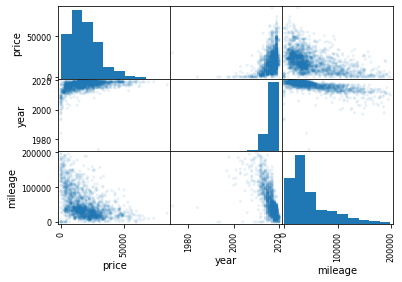

In [170]:
_=pd.plotting.scatter_matrix(df[['price', 'year', 'mileage']], alpha=0.1)

In [338]:
df[['price', 'year', 'mileage']].corr()

,price,year,mileage
price,1.000000,0.385894,-0.457180
year,0.385894,1.000000,-0.647935
mileage,-0.457180,-0.647935,1.000000


Newer items have higher and more variable prices than older items

In [176]:
px.density_heatmap(df, x="year", y="mileage", z="price", histfunc="avg",  marginal_x="histogram", marginal_y="histogram")

# Brand

In [187]:
px.histogram(df, x="brand", title = 'Brand')

In [378]:
brand_df = df.groupby('brand')[['price','vin']].agg({'vin':'count', 'price':'mean'}).sort_values('vin', ascending = False).reset_index()
px.bar(brand_df, x= 'brand' , y= 'price',hover_data= ['vin'], title = 'avg price per Brand (ordered by #vin)')

The ford brand is very well represented. BMW, Merchedes have the highest average price amongh the brand with at least 5 items, while Honda and hyndai are the most economics.

# Color

In [189]:
px.histogram(df, x="color", title = 'Brand')

In [379]:
color_df = df.groupby('color')[['price','vin']].agg({'vin':'count', 'price':'mean'}).sort_values('vin', ascending = False).reset_index()
px.bar(color_df, x= 'color' , y= 'price',hover_data= ['vin'], title = 'avg price per color (ordered by # vin)')

There seem to be two types of colors. The "simple" colors such as white, black, etc. ... and the colors of the brands such as *shadow black*, *magnetic metalic*, *royal crimson metallic tinted clearcoat* etc. ...

In [380]:
df[df.color =='shadow black']

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,state_code,# condition,mesure unit condition,condition hours,model_cluster
1911,1911,17900,ford,doors,2016,clean vehicle,27940.0,shadow black,1fa6p8am3g5250504,167653520,massachusetts,usa,11 days left,MA,11,days,264.0,3
1876,1876,30999,ford,doors,2016,clean vehicle,6249.0,shadow black,1fa6p8cf1g5209884,167653387,connecticut,usa,11 days left,CT,11,days,264.0,3
1975,1975,32999,ford,doors,2018,clean vehicle,6881.0,shadow black,1fa6p8cf3j5172103,167654222,new jersey,usa,11 days left,NJ,11,days,264.0,3
1886,1886,24549,ford,doors,2016,clean vehicle,44941.0,shadow black,1fatp8ffxg5291869,167653391,new york,usa,11 days left,NY,11,days,264.0,3
1938,1938,24857,ford,doors,2018,clean vehicle,33815.0,shadow black,1fatp8uh3j5157023,167654214,massachusetts,usa,11 days left,MA,11,days,264.0,3


In [381]:
df[df.color =='billet silver metallic clearcoat']

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,state_code,# condition,mesure unit condition,condition hours,model_cluster
891,891,15322,dodge,doors,2014,clean vehicle,49982.0,billet silver metallic clearcoat,2c3cdyag3eh251064,167477486,new jersey,usa,8 days left,NJ,8,days,192.0,3
884,884,14900,dodge,doors,2014,clean vehicle,46859.0,billet silver metallic clearcoat,2c3cdyag6eh133624,167477465,new jersey,usa,8 days left,NJ,8,days,192.0,3
890,890,25250,dodge,doors,2014,clean vehicle,7608.0,billet silver metallic clearcoat,2c3cdybt6eh111229,167477485,new york,usa,8 days left,NY,8,days,192.0,3


# State and country

In [201]:
df.country.value_counts()

 usa       2437
 canada       7
Name: country, dtype: int64

In [204]:
df[df.country == ' canada'].state

814    ontario
816    ontario
817    ontario
813    ontario
815    ontario
818    ontario
261    ontario
Name: state, dtype: object

Almost all of the ads are from the US except 7 from Canada, specifically Ontario. This means that the *state* column is not informative.

In [264]:
states = {'alaska': 'AK',
 'alabama': 'AL',
 'arkansas': 'AR',
 'arizona': 'AZ',
 'california': 'CA',
 'colorado': 'CO',
 'connecticut': 'CT',
 'district of columbia': 'DC',
 'delaware': 'DE',
 'florida': 'FL',
 'georgia': 'GA',
 'hawaii': 'HI',
 'iowa': 'IA',
 'idaho': 'ID',
 'illinois': 'IL',
 'indiana': 'IN',
 'kansas': 'KS',
 'kentucky': 'KY',
 'louisiana': 'LA',
 'massachusetts': 'MA',
 'maryland': 'MD',
 'maine': 'ME',
 'michigan': 'MI',
 'minnesota': 'MN',
 'missouri': 'MO',
 'mississippi': 'MS',
 'montana': 'MT',
 'north carolina': 'NC',
 'north dakota': 'ND',
 'nebraska': 'NE',
 'new hampshire': 'NH',
 'new jersey': 'NJ',
 'new mexico': 'NM',
 'nevada': 'NV',
 'new york': 'NY',
 'ohio': 'OH',
 'oklahoma': 'OK',
 'oregon': 'OR',
 'pennsylvania': 'PA',
 'rhode island': 'RI',
 'south carolina': 'SC',
 'south dakota': 'SD',
 'tennessee': 'TN',
 'texas': 'TX',
 'utah': 'UT',
 'virginia': 'VA',
 'vermont': 'VT',
 'washington': 'WA',
 'wisconsin': 'WI',
 'west virginia': 'WV',
 'wyoming': 'WY',
 'ontario': 'CAN'}

<ipython-input-264-fc9d0f03fec5>:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [383]:
df_state = df.groupby('state')[['price','vin']].agg({'vin':'count', 'price':'mean'}).sort_values('vin', ascending = False).reset_index()


df_state['state_code']=df_state.state.apply(lambda x: states[x])

px.choropleth(df_state, locations='state_code',
                    locationmode="USA-states",
                    color= 'price' , 
                    hover_data = ['state','vin'],
                    scope="usa")

*I have eliminated the state of Ontario in the visualization. Dealing with US and other states is a bit cumbersome

# Condition

In [297]:
df['# condition'] =df.condition.apply(lambda x : int(x.split()[0] if x != 'Listing Expired' else -1 ) )
df['mesure unit condition'] =df.condition.apply(lambda x : x.split()[1] ) 

<ipython-input-297-7606f02d3490>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-297-7606f02d3490>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [301]:
df['condition hours'] = -1
df['condition hours'][df['mesure unit conition'] =='minutes'] =  \
    df['# condition'][df['mesure unit condition'] =='minutes'] /60

df['condition hours'][df['mesure unit condition'] =='hours'] =  \
    df['# condition'][df['mesure unit condition'] =='hours'] 

df['condition hours'][df['mesure unit condition'] =='days'] =  \
    df['# condition'][df['mesure unit condition'] =='days'] *24

<ipython-input-301-dc6fdfa737bb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-301-dc6fdfa737bb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/luca/.local/lib/python3.8/site-packages/pandas/core/series.py:990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-301-dc6fdfa737bb>:5: SettingWithCopyWarning:


A value is trying to be set on a copy

In [385]:
df[['condition','condition hours' ]]

,condition,condition hours
390,2 hours left,2.0
416,2 days left,48.0
200,21 hours left,21.0
185,2 days left,48.0
456,22 hours left,22.0
...,...,...
453,20 hours left,20.0
488,2 days left,48.0
270,2 days left,48.0
444,2 days left,48.0


In [384]:
px.histogram(df, x="condition hours", title = 'condition')

the majority of records have conditions <= 2 days

In [316]:
df_condition = df.groupby('condition hours')[['price','vin']].agg({'vin':'count', 'price':'mean'}).sort_values('vin', ascending = False).reset_index()

In [328]:
df_condition

px.scatter(df_condition , x="condition hours",y = 'price',size = 'vin', title = 'condition')

In [337]:
df[['price', 'condition hours']].corr()

,price,condition hours
price,1.00000,-0.00691
condition hours,-0.00691,1.00000


The correlation is very low, probably this is not a important feature

# Title status

In [340]:
px.histogram(df, x="title_status", title = 'Title Status distribution')

In [342]:
df_title_status = df.groupby('title_status')[['price','vin']].agg({'vin':'count', 'price':'mean'}).sort_values('vin', ascending = False).reset_index()
px.bar(df_title_status , x= 'title_status' , y= 'price',hover_data= ['vin'], title = 'avg price per brand')

This categorical variable in addition to having a limited number of classes (2) is also very informative. 